# Explore wave format
Based on [Speech Command Classification with torchaudio](https://pytorch.org/tutorials/intermediate/speech_command_recognition_with_torchaudio.html)

In [2]:
import IPython as ipd
import librosa
from utils import *

import torch
import torch.nn
import torch.optim
from torch.utils.data import IterableDataset

from collections import OrderedDict

import os
import timeit
from time import time

import torchaudio
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DEVICE = "cpu"
if torch.cuda.is_available():
    DEVICE = "cuda"

print(f"USING DEVICE {DEVICE}")

USING DEVICE cuda


In [4]:
# Define source paths. Place data under working directory and name folder "voicedata"
DATA_DIR = "./commands"
TARGET_RATE = 8000
EPOCHS = 10
os.makedirs(DATA_DIR, exist_ok=True)
train_set = SpeechCommandsSubset(root=DATA_DIR, download=True)

# labels = sorted(list(set(datapoint[2] for datapoint in train_set)))
labels = train_set.labels

print(f'  Training Set: {len(train_set)}')
print(f'   Data Labels: {len(labels)}')

  Training Set: 84843
   Data Labels: 35


In [40]:
waveform, rate, label, speaker, id = train_set[52021]
print(f"Label: {label} ({label_to_index(label, labels)})")
print(rate)
print(waveform.size())
ipd.display.Audio(data=waveform, rate=rate)

Label: right (22)
16000
torch.Size([1, 16000])


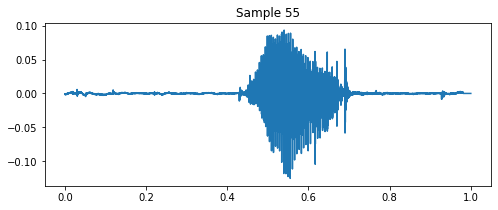

In [41]:
Y = waveform.view(-1).numpy()
times = np.linspace(0, len(Y) / rate, len(Y))
plot(times, Y, title="Sample 55")

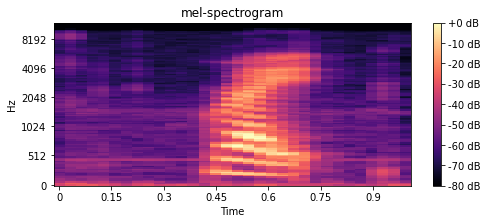

In [42]:
spectrogram = librosa.feature.melspectrogram(y=waveform.view(-1).numpy(), sr=rate)
plot_spectro(spectrogram, rate)

In [43]:
sound = waveform.unsqueeze(0)

In [44]:
print(sound[0:10])

tensor([[[-0.0005, -0.0010, -0.0009,  ...,  0.0000,  0.0000,  0.0000]]])


In [45]:
print(torch.max(sound[0:10]))

tensor(0.0933)


In [58]:
sample, rate = torchaudio.load("src/processor/bin/c518d1b1_nohash_1.wav")
print(sample.shape)
for f in sample[0, 0:10]:
    print(f.item())

torch.Size([1, 16000])
-0.001739501953125
-0.001312255859375
-0.00262451171875
-0.001983642578125
-0.000640869140625
-0.000396728515625
0.0010986328125
0.0010986328125
-0.001220703125
-0.001495361328125


First ten values for same file from opencv in C++:
```
[-0.001739502, -0.0013122559, -0.0026245117, -0.0019836426, -0.00064086914, -0.00039672852, 0.0010986328, 0.0010986328, -0.0012207031, -0.0014953613]
```